# <ins>Content Strategies for CS-Streaming</ins>

### Exploring the Netflix Dataset:
Netflix is one of the world's largest streaming platforms, with millions of users streaming movies and TV shows every day. As a result, Netflix has accumulated a massive amount of data that can be used to gain insights into user behaviour, preferences, and more. In this project, students will explore a dataset containing information about movies and TV shows available on Netflix.

### Brief:
The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new streaming service. They are confident that your analysis will be helpful to you in making decisions about their service. They need your expertise to uncover trends and insights from the Netflix data that will be beneficial to their new product. They are eager to begin this project and will therefore need a timely response.

You are to report on how CS-Streaming can best optimise its services and compete with Netflix.

## <ins>Task</ins>

### About the Dataset:
The dataset is available [here](https://www.kaggle.com/datasets/shivamb/netflix-shows).

This tabular dataset encompasses a comprehensive listing of all the movies and TV shows available on Netflix, providing intricate details such as cast, directors, ratings, release year, duration, and more. 

### Key Columns in the Dataset:
1. `show_id`: An exclusive identifier for each show on Netflix.
2. `type`: Indicates whether the entry is a "Movie" or a "TV Show."
3. `title`: The name of the movie or TV show.
4. `director`: The director(s) responsible for the movie or TV show.
5. `cast`: The principal cast or actors featured in the movie or TV show.
6. `country`: The country or countries where the movie or TV show was produced.
7. `date_added`: The date when the movie or TV show was added to the Netflix catalogue.
8. `release_year`: The original release year of the movie or TV show.
9. `rating`: The content rating assigned to the movie or TV show (e.g., PG, TV-MA, etc.).
10. `duration`: For movies, the duration is in minutes; for TV shows, the number of seasons.
11. `listed_in`: The genre(s) or category(ies) classifying the movie or TV show.
12. `description`: A concise summary of the movie or TV show.

---------------

### Importing the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/netflix_titles.csv')

In [3]:
# having a look at the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


---------------------
### Data Cleaning:

In [5]:
# copying data to maintain the original dataset
df_netflix = df.copy()

In [6]:
# correcting date format
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])

In [7]:
# checking the nulls in the data
print(df_netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
# the date column contains some nulls, and these cannot be replaced with any other values, so they will be removed
df_netflix.dropna(subset=['date_added'], inplace=True)

In [9]:
# extracting the month and year
df_netflix['month'] = df_netflix['date_added'].dt.month
df_netflix['year'] = df_netflix['date_added'].dt.year
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [10]:
#filling in the remaining nulls with "Unknown"
df_netflix[['director', 'cast', 'country', 'rating', 'duration']] = \
df_netflix[['director', 'cast', 'country', 'rating', 'duration']].fillna('Unknown')

In [11]:
# changing 'listed_in' to 'genre' for better readability
df_netflix.rename(columns={'listed_in': 'genre'}, inplace=True)

In [12]:
# reordering after the new columns for better readability
df_netflix = df_netflix[['show_id', 'type','title', 'director', 'cast', 'country', 'date_added', 'month', 'year', 'release_year', \
         'rating', 'duration', 'genre', 'description']]
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,month,year,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,9,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,9,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,9,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,9,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,9,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# checking for duplicates
print(df_netflix.duplicated().sum())

0


In [14]:
df_netflix['rating'].value_counts() 
# some of the values should be in the 'duration' column instead

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [15]:
# gathering the indexes for these values
text = ['74 min', '84 min', '66 min']
for i in text:
    row_index = df_netflix[df_netflix['rating'] == i].index[0]
    print(f'{i} is in the row {row_index}.')

74 min is in the row 5541.
84 min is in the row 5794.
66 min is in the row 5813.


In [16]:
#replacing the values with "Unkown"
df_netflix.loc[5541, 'rating'] = 'Unknown'
df_netflix.loc[5794, 'rating'] = 'Unknown'
df_netflix.loc[5813, 'rating'] = 'Unknown'

# adding the values to the correct column
df_netflix.loc[5541, 'duration'] = '74 min'
df_netflix.loc[5794, 'duration'] = '84 min'
df_netflix.loc[5813, 'duration'] = '66 min'

In [17]:
df_netflix.info() # no more nulls, columns are in the correct format and data has been cleaned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   month         8797 non-null   int64         
 8   year          8797 non-null   int64         
 9   release_year  8797 non-null   int64         
 10  rating        8797 non-null   object        
 11  duration      8797 non-null   object        
 12  genre         8797 non-null   object        
 13  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.3+ MB


## Exploratory Data Analysis
----------------------

### Content Types:

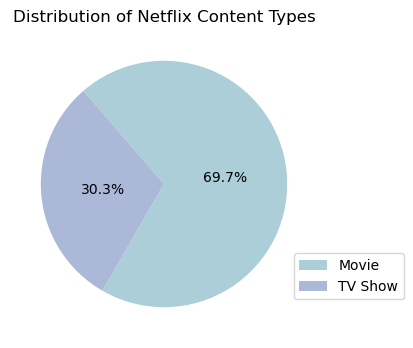

In [18]:
#looking at the types of content Netflix has the offer
type_count = df_netflix['type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(type_count, autopct='%1.1f%%', startangle=240, colors=['#ABCED8', '#ABB8D8'], \
        pctdistance=0.5, textprops={'fontsize': 10})
plt.title('Distribution of Netflix Content Types')
plt.legend(labels=type_count.index, loc="center", bbox_to_anchor=(1.1, 0.2), fontsize=10)

plt.show()

In [19]:
#spliting dataframe into Movies and TV Shows
movies = df_netflix[df_netflix['type'] == 'Movie'].copy()
tvshows = df_netflix[df_netflix['type'] == 'TV Show'].copy()

### In this notebook, TV Shows will be analysed.
-----------------------------
### TV Shows by Year:

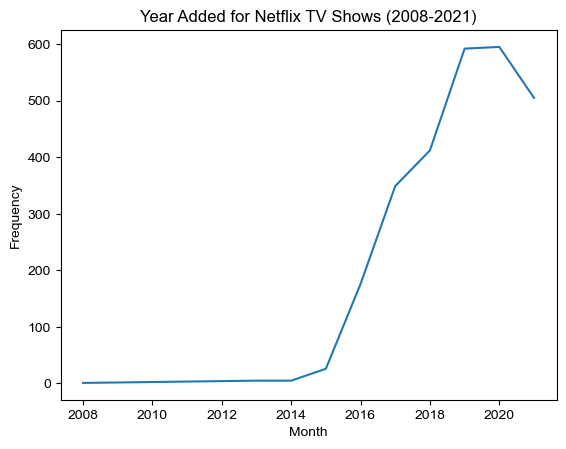

In [20]:
# understanding which years most of the data orginates from
tvshow_year_count = tvshows['year'].value_counts()
tvshow_year = sns.lineplot(x = tvshow_year_count.index, y=tvshow_year_count)
sns.set(rc = {'figure.figsize':(12, 4)})
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Year Added for Netflix TV Shows (2008-2021)')
plt.show()

In [21]:
tvshow_year_count

2020    595
2019    592
2021    505
2018    412
2017    349
2016    176
2015     26
2014      5
2013      5
2008      1
Name: year, dtype: int64

### TV Show Duration:

In [22]:
# filtering to 2015-2021
tvshows_year_2015_2021 = tvshows[(tvshows['year'] == 2015) | (tvshows['year'] == 2016) | (tvshows['year'] == 2017) |
                                (tvshows['year'] == 2018) | (tvshows['year'] == 2019) | (tvshows['year'] == 2020) |
                                (tvshows['year'] == 2021)].copy()


In [23]:
# looking into the duration of TV Shows during these years
tvshows_year_2015_2021['duration'].value_counts()

1 Season      1790
2 Seasons      421
3 Seasons      196
4 Seasons       93
5 Seasons       61
6 Seasons       32
7 Seasons       23
8 Seasons       16
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

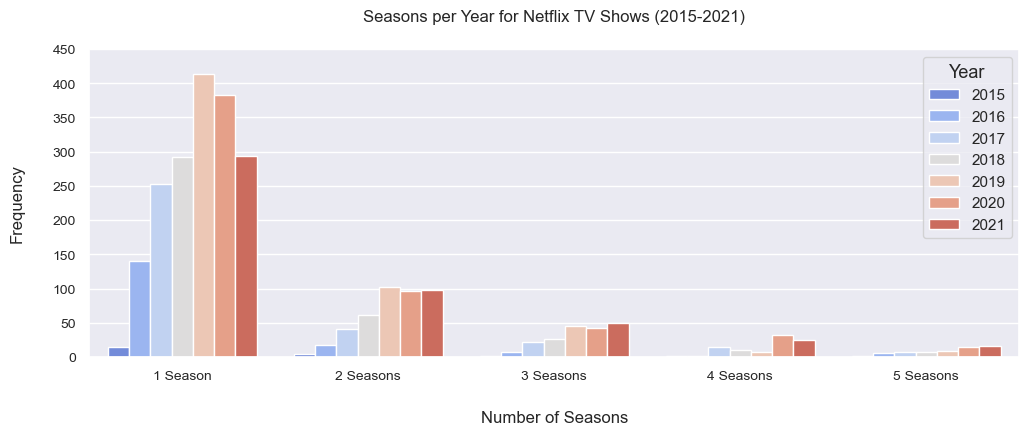

In [24]:
# plotting year against season = most seasons last from 1-5
season_order = ['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons']
season_by_year = sns.countplot(x = 'duration', hue='year', order=season_order, data=tvshows_year_2015_2021, palette='coolwarm')
sns.set(rc = {'figure.figsize':(12, 4)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Seasons', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.ylim(0, 450)
plt.title('Seasons per Year for Netflix TV Shows (2015-2021)', fontsize=12, pad=20)
plt.legend(title='Year', title_fontsize='13', loc='upper right')
plt.show()

### TV Show Genres:

In [25]:
# splitting listed genres into individual genres
genres = tvshows['genre'].str.split(', ').explode()
genres_count = genres.value_counts()
genres_count

International TV Shows          1350
TV Dramas                        762
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 252
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               83
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 26
TV Shows                          16
Name: genre, dtype: int64

In [44]:
# picking top genres which are not country-specific/ international (generic genres)
wanted_genres = ('TV Dramas', 'TV Comedies', 'Crime TV Shows', "Kids' TV", 'Docuseries', 'Romantic TV Shows', 'Reality TV', \
                 'TV Action & Adventure', 'TV Mysteries')
genres = tvshows['genre'].str.split(', ').explode()
filtered = genres[genres.isin(wanted_genres)]
filtered_genre_count = pd.DataFrame(filtered.value_counts())
filtered_genre_count.rename(columns={'genre': 'count'}, inplace=True)
filtered_genre_count['percentage'] = round((filtered_genre_count['count'] / filtered_genre_count['count'].sum()) * 100, 2)
filtered_genre_count

,count,percentage
TV Dramas,762,21.54
TV Comedies,574,16.22
Crime TV Shows,469,13.26
Kids' TV,449,12.69
Docuseries,394,11.14
Romantic TV Shows,370,10.46
Reality TV,255,7.21
TV Action & Adventure,167,4.72
TV Mysteries,98,2.77


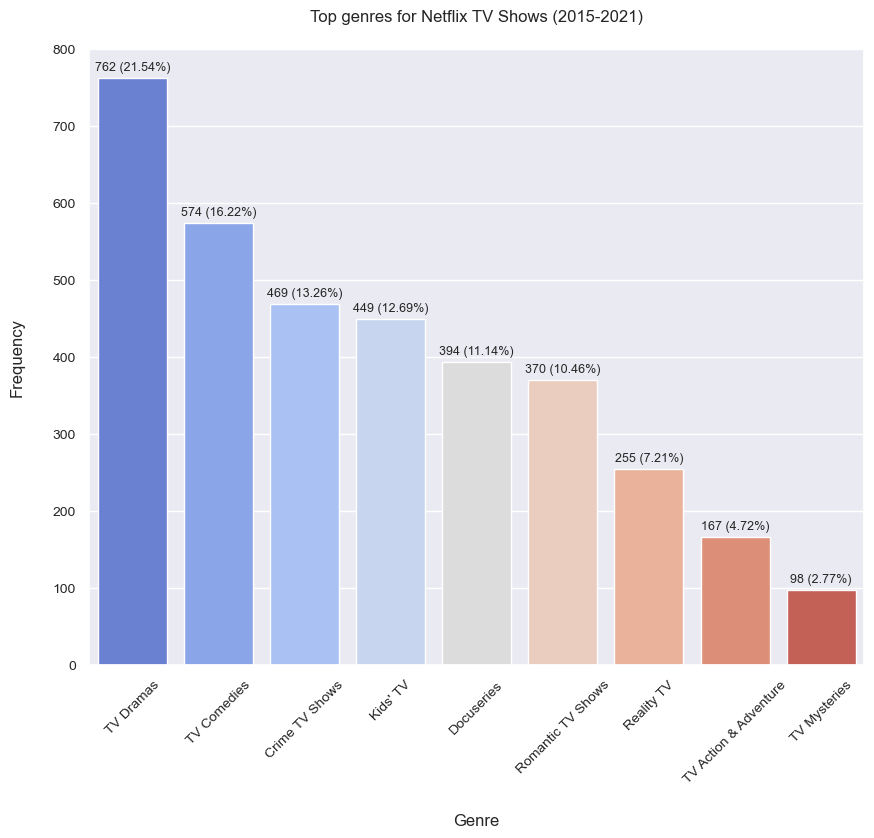

In [45]:
#plotting barplot
top_genres = sns.barplot(x = filtered_genre_count['count'].index, y=filtered_genre_count['count'], palette='coolwarm')
sns.set(rc = {'figure.figsize':(12, 8)})
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('Top genres for Netflix TV Shows (2015-2021)', fontsize=12, pad=20)

for bar, count, percentage in zip(top_genres.patches, filtered_genre_count['count'], filtered_genre_count['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f"{count} ({percentage}%)", ha='center', fontsize=9)

plt.show()

### Top Countries for TV Shows:

In [28]:
#filtering country without "Unknowns"
country_stats_tvshow = pd.DataFrame(tvshows[tvshows['country'] != 'Unknown']['country'].value_counts())
country_stats_tvshow.rename(columns={'country': 'count'}, inplace=True)
country_stats_tvshow['percentage'] = round((country_stats_tvshow['count'] / country_stats_tvshow['count'].sum()) * 100, 2)
top_10_countries = country_stats_tvshow.head(10)
top_10_countries

,count,percentage
United States,754,33.13
United Kingdom,212,9.31
Japan,168,7.38
South Korea,158,6.94
India,79,3.47
Taiwan,68,2.99
Canada,59,2.59
France,49,2.15
Spain,48,2.11
Australia,47,2.07


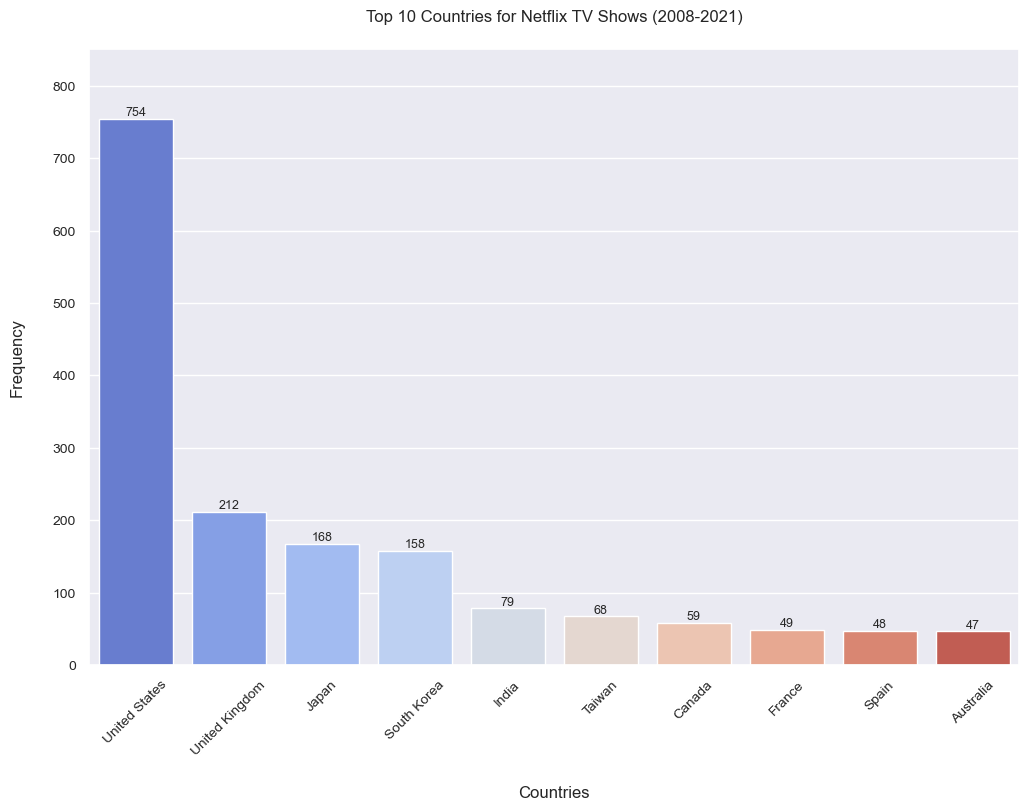

In [46]:
# plotting top 10 countries
top_10_countries_bar = sns.barplot(x = top_10_countries['count'].index, y=top_10_countries['count'], palette='coolwarm')
sns.set(rc = {'figure.figsize':(12, 4)})
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Countries', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.ylim(0, 850)
plt.title('Top 10 Countries for Netflix TV Shows (2008-2021)', fontsize=12, pad=20)

for bar in top_10_countries_bar.patches:
    height = bar.get_height()
    top_10_countries_bar.text(bar.get_x() + bar.get_width() / 2, height, 
                              f'{height:.0f}', 
                              ha='center', va='bottom', fontsize=9)

plt.show()

### Time Series with top genres and countries:

In [30]:
# creating a new dataframe with month, year, top genres and top countris
tvshows_new_df = pd.DataFrame({'month': tvshows['month'], 'year': tvshows['year'], 'genre': genres, 'country': tvshows['country']})
tvshows_new_df = tvshows_new_df[tvshows_new_df['country'] != 'Unknown'] #drop unknown countries
tvshows_new_df['month'] = tvshows_new_df['month'].astype(int) # change to integers
tvshows_new_df['year'] = tvshows_new_df['year'].astype(int) # change to integers

# Filter for top 5 wanted genres
wanted_tv_genres = ['TV Dramas', 'TV Comedies', 'Crime TV Shows', "Kids' TV", 'Docuseries']
filtered_tvshows_new_df = tvshows_new_df[tvshows_new_df['genre'].isin(wanted_tv_genres)]

#Filter for top 10 countries
top_tvshow_countries = ['United States', 'United Kingdom', 'Japan', 'South Korea', 'India', 'Taiwan', 'Canada', 'France', 'Spain', 'Australia']
top_country_genre_tvshows = filtered_tvshows_new_df[filtered_tvshows_new_df['country'].isin(top_tvshow_countries)]
top_country_genre_tvshows

,month,year,genre,country
4,9,2021,TV Comedies,India
15,9,2021,TV Comedies,United States
15,9,2021,TV Dramas,United States
25,9,2021,Docuseries,Australia
32,9,2021,TV Comedies,United Kingdom
...,...,...,...,...
8755,11,2016,Crime TV Shows,United States
8755,11,2016,Docuseries,United States
8758,2,2019,Docuseries,United Kingdom
8775,8,2018,TV Comedies,India


### Country by Year:

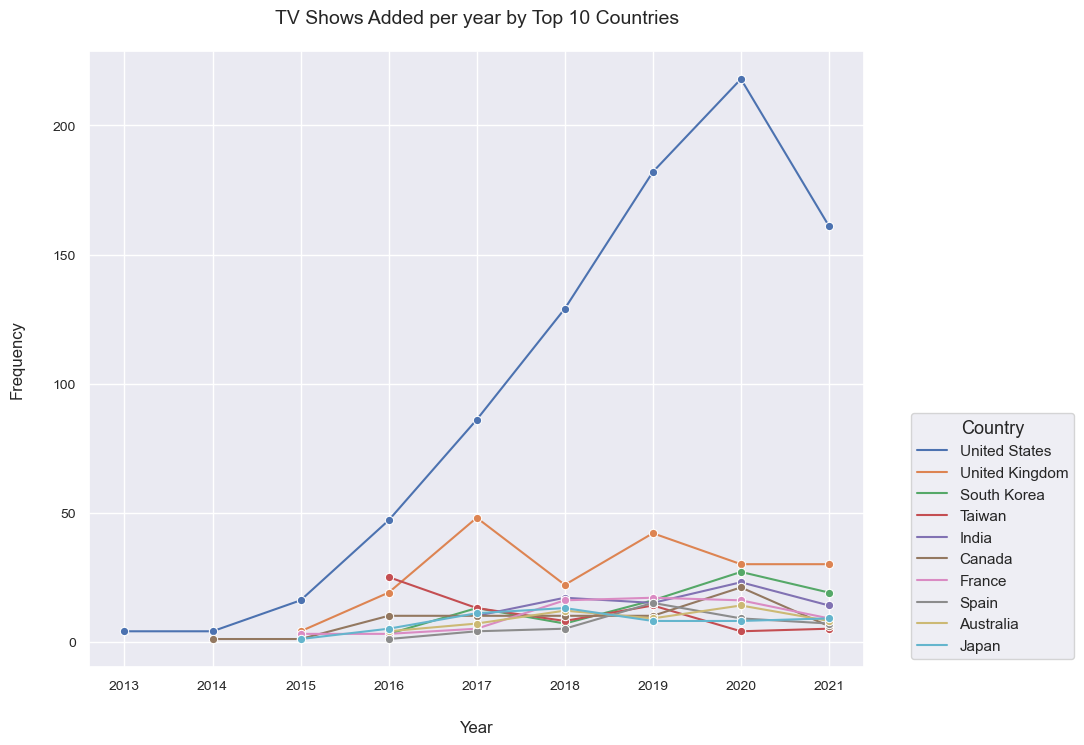

In [49]:
# year by country count
year_by_country = top_country_genre_tvshows.groupby(['year', 'country'])\
                  .size().reset_index(name='count').sort_values(by='count', ascending=False)

year_country_line = sns.lineplot(x='year', y='count', hue='country', data=year_by_country, marker='o')

sns.set(rc = {'figure.figsize':(8, 8)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('TV Shows Added per year by Top 10 Countries', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left',title='Country', title_fontsize='13')
plt.show()

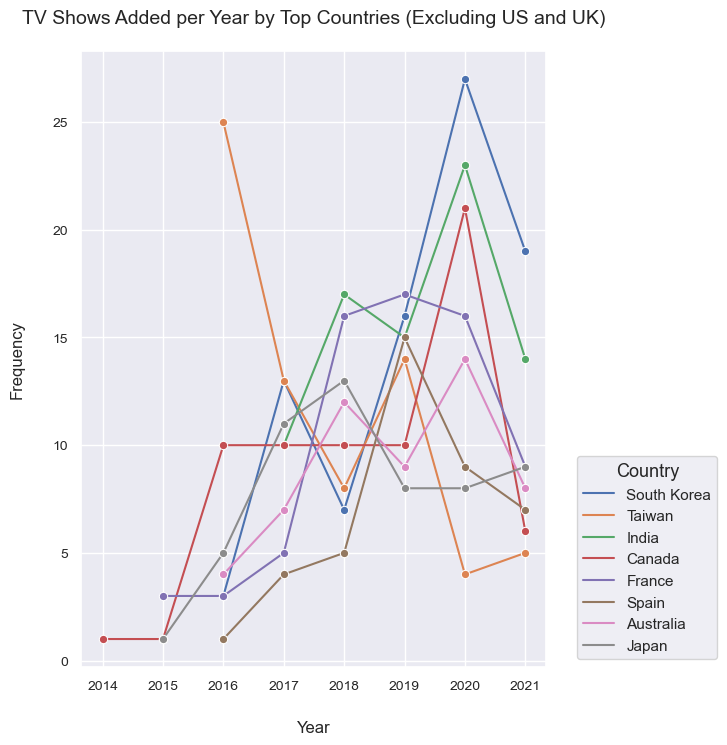

In [32]:
# filter out rows where the country is 'United States' and 'United Kingdom' to have a closer view of other countries
year_by_country_no_us_uk = year_by_country[(year_by_country['country'] != 'United States') \
                                           & (year_by_country['country'] != 'United Kingdom')]

year_country_line = sns.lineplot(x='year', y='count', hue='country', data=year_by_country_no_us_uk, marker='o')
sns.set(rc={'figure.figsize': (6, 8)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('TV Shows Added per Year by Top Countries (Excluding US and UK)', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', title='Country', title_fontsize='13')
plt.show()


### From the line graph above, we can see that there are a number of non-English speaking countries that are quite popular - noteably these are South Korea, Japan, India and France. There have been huge increases in content added from 2018 onwards, so gathering the percentage change of these countries will help determine if international TV Shows should be considered.

In [33]:
# filter tvshow dataframe to only years 2013-2017
country_stats_tvshow_2013_2017 = pd.DataFrame(tvshows[(tvshows['country'] != 'Unknown') & 
                            ((tvshows['year'] == 2013) | (tvshows['year'] == 2014) | 
                             (tvshows['year'] == 2015) | (tvshows['year'] == 2016) |
                             (tvshows['year'] == 2017))]['country'].value_counts())
country_stats_tvshow_2013_2017.rename(columns={'country': 'count'}, inplace=True) #rename column for readability

#find percentage of each country's contribution to the total statistics
country_stats_tvshow_2013_2017['percentage'] = round((country_stats_tvshow_2013_2017['count'] / 
                                                      country_stats_tvshow_2013_2017['count'].sum()) * 100, 2)

In [34]:
# filter tvshow dataframe to only years 2018-2021
country_stats_tvshow_2018_2021 = pd.DataFrame(tvshows[(tvshows['country'] != 'Unknown') & 
                            ((tvshows['year'] == 2018) | (tvshows['year'] == 2019) | 
                             (tvshows['year'] == 2020) | (tvshows['year'] == 2021))]['country'].value_counts())
country_stats_tvshow_2018_2021.rename(columns={'country': 'count'}, inplace=True) #rename column for readability

#find percentage of each country's contribution to the total statistics
country_stats_tvshow_2018_2021['percentage'] = round((country_stats_tvshow_2018_2021['count'] / 
                                                      country_stats_tvshow_2018_2021['count'].sum()) * 100, 2)

In [35]:
# join these two dataframes, giving suffics to distinguish the data
joined_stats_country = country_stats_tvshow_2013_2017.join(country_stats_tvshow_2018_2021, lsuffix='_2013_2017', \
                                                           rsuffix='_2020_2021')
# find percentage change for each country (2013-2017 vs. 2018-2021)
joined_stats_country['percentage_change'] = round((joined_stats_country['count_2020_2021'] - \
                                              joined_stats_country['count_2013_2017']) / \
                                                joined_stats_country['count_2013_2017'] * 100, 2)

#Now filter to the columns we are interested in:
# 'United States', 'United Kingdom', 'Japan', 'South Korea', 'India', 'Taiwan', 'Canada', 'France', 'Spain', 'Australia'
top_international_countries_tvshows = ['Japan', 'South Korea', 'India', 'France']
filtered_joined_stats_country = joined_stats_country[joined_stats_country.index.isin(top_international_countries_tvshows)]
filtered_joined_stats_country

,count_2013_2017,percentage_2013_2017,count_2020_2021,percentage_2020_2021,percentage_change
South Korea,41,8.04,117.0,6.63,185.37
Japan,32,6.27,136.0,7.71,325.00
India,14,2.75,65.0,3.68,364.29
France,7,1.37,42.0,2.38,500.00


### Genre by Year:

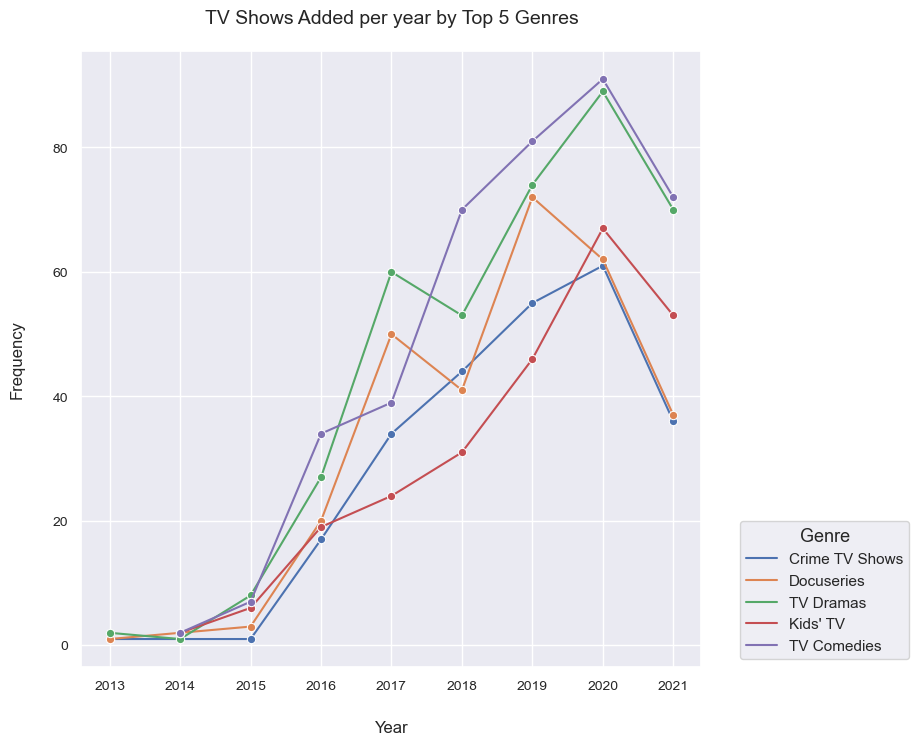

In [50]:
# year by genre
year_by_genre = top_country_genre_tvshows.groupby(['year', 'genre']).size().reset_index(name='count')
year_by_genre

year_genre_line = sns.lineplot(x='year', y='count', hue='genre', data=year_by_genre, marker='o')

sns.set(rc = {'figure.figsize':(8, 3)})
plt.xticks(rotation='horizontal', fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('TV Shows Added per year by Top 5 Genres', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left',title='Genre', title_fontsize='13')
plt.show()

### Genre by Month:

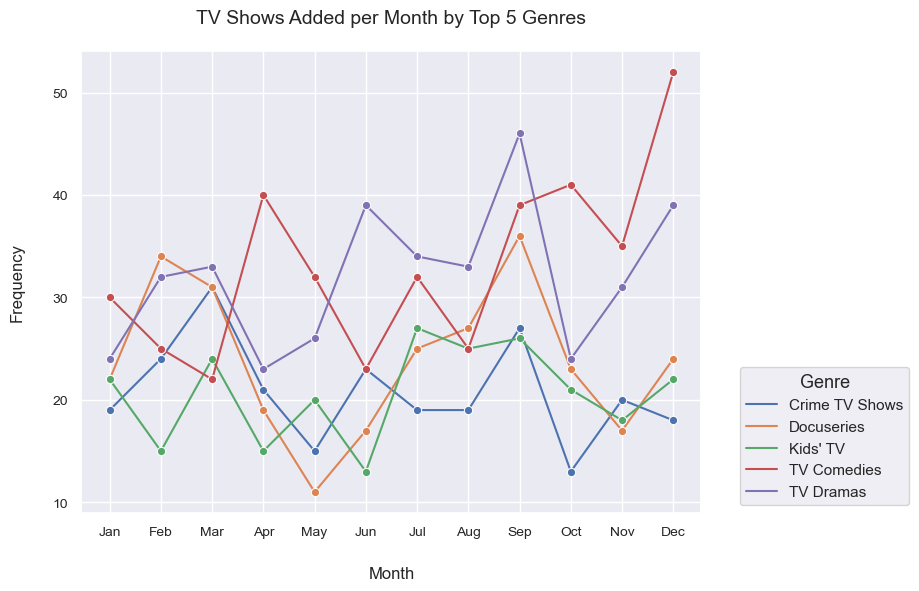

In [52]:
# month by genre
month_by_genre = top_country_genre_tvshows.groupby(['month', 'genre']).size().reset_index(name='count')

month_genre_line = sns.lineplot(x='month', y='count', hue='genre', data=month_by_genre, marker='o')

sns.set(rc = {'figure.figsize':(8, 6)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)

#for better readability
month_genre_line.set_xticks(range(1, 13))
month_genre_line.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

plt.title('TV Shows Added per Month by Top 5 Genres', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left',title='Genre', title_fontsize='13')
plt.show()

In [38]:
month_by_genre.groupby('month')['count'].sum().sort_values(ascending=False)

month
9     174
12    155
3     141
7     137
2     130
8     129
10    122
11    121
4     118
1     117
6     115
5     104
Name: count, dtype: int64

### Top 10 Actors per Country:
As the cast actors are all listed, it is more helpful to split and stack them so they can be grouped more efficently:

In [39]:
def top_10_actors_by_country(df, country, n=10):
    df_country = df[df['country'] == country].copy()
    df_country = df_country[df_country != 'Unknown'].dropna()
    all_actors = df_country['cast'].str.split(', ').explode()
    actors_count = pd.DataFrame(all_actors.value_counts())
    actors_count.rename(columns={'cast': 'count'}, inplace=True)
    actors_count['percentage'] = round((actors_count / df_country.shape[0]) * 100, 2)
    top_10_actors = actors_count.head(10)
    return top_10_actors

In [40]:
top_10_US_actors_tvshows = top_10_actors_by_country(tvshows, 'United States')
top_10_US_actors_tvshows

,count,percentage
Keiynan Lonsdale,2,7.41
Dave Chappelle,2,7.41
Grant Gustin,1,3.70
Ben Rosenfield,1,3.70
Drew Powell,1,3.70
Morena Baccarin,1,3.70
Anthony Carrigan,1,3.70
Crystal Reed,1,3.70
Chris Chalk,1,3.70
Damian Young,1,3.70


In [41]:
top_10_UK_actors_tvshows = top_10_actors_by_country(tvshows, 'United Kingdom')
top_10_UK_actors_tvshows

,count,percentage
Bertie Carvel,2,10.53
David Attenborough,2,10.53
Mel Giedroyc,1,5.26
Edward Holcroft,1,5.26
Samantha Spiro,1,5.26
Charlotte Rampling,1,5.26
Lorraine Ashbourne,1,5.26
David Hayman,1,5.26
Clarke Peters,1,5.26
Adrian Lester,1,5.26


In [60]:
top_10_SK_actors_tvshows = top_10_actors_by_country(tvshows, 'South Korea')
top_10_SK_actors_tvshows

,count,percentage
Yoo Yeon-seok,2,20.0
Lee Il-hwa,2,20.0
Sung Dong-il,2,20.0
Song Jong-ho,1,10.0
Shim Dal-gi,1,10.0
Kim Tae-hun,1,10.0
Park Hae Soo,1,10.0
Bae Doona,1,10.0
Lee Ji-eun (IU),1,10.0
Lee Ho-won,1,10.0


### Count of Rating Categories:

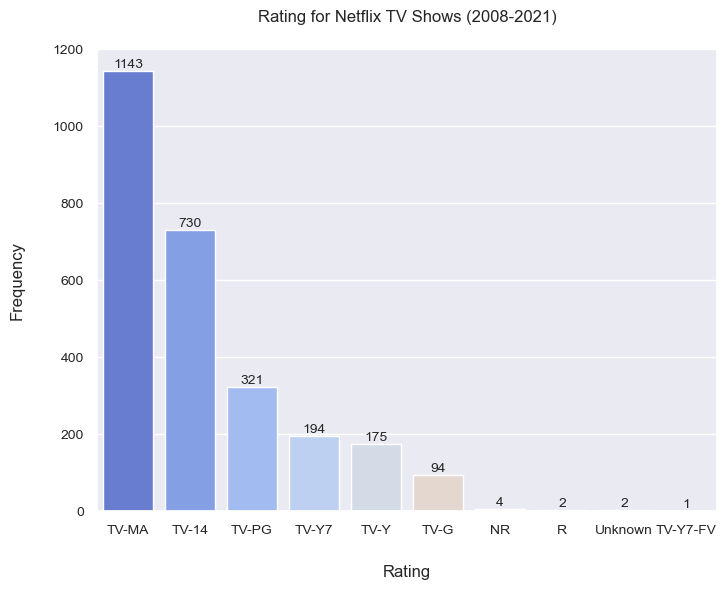

In [57]:
rating_count = tvshows['rating'].value_counts()
rating_bar = sns.barplot(x = rating_count.index, y = rating_count, palette='coolwarm')
sns.set(rc = {'figure.figsize':(8, 6)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Rating', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('Rating for Netflix TV Shows (2008-2021)', fontsize=12, pad=20)

for index, value in enumerate(rating_count):
    plt.text(index, value + 10, str(value), ha='center', fontsize=10)

plt.show()